In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [163]:
dtypes={'educ':'category',
        'occupation':'category', 'occupation_husb':'category',
        'affair':np.bool}
data=pd.read_csv("enquete_couples.csv",index_col=0, dtype=dtypes)

In [187]:
data.dtypes

rate_marriage       float64
age                 float64
yrs_married         float64
children            float64
religious           float64
educ               category
occupation         category
occupation_husb    category
affair                 bool
dtype: object

In [165]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious
affair,,,,,
False,4.329701,28.390679,7.989335,1.238813,2.504521
True,3.647345,30.537019,11.152460,1.728933,2.261568


In [188]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,affair
rate_marriage,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,0.181446


In [189]:
# show plots in the notebook
%matplotlib inline

Text(0, 0.5, 'Frequence')

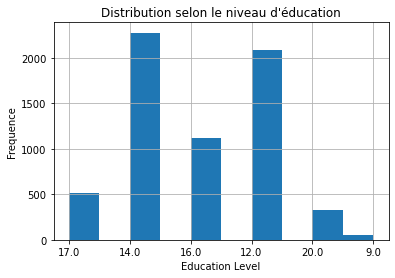

In [190]:
# histogram of education
data.educ.hist()
plt.title('Distribution selon le niveau d\'éducation')
plt.xlabel('Education Level')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequences')

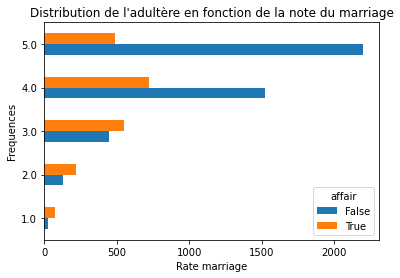

In [191]:
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='barh')
plt.title('Distribution de l\'adultère en fonction de la note du marriage')
plt.xlabel('Rate marriage')
plt.ylabel('Frequences')

Text(0, 0.5, 'Percentage')

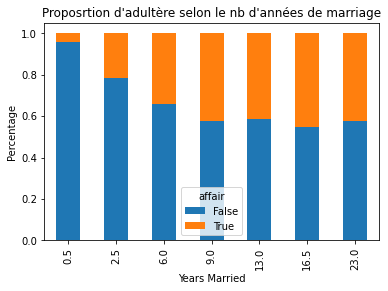

In [192]:
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proposrtion d\'adultère selon le nb d\'années de marriage')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

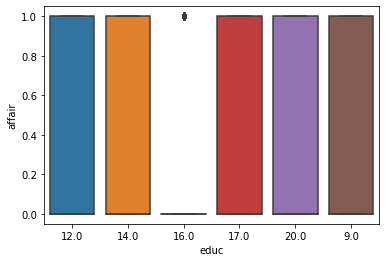

In [193]:
import seaborn as sns
data['educ']=data.educ.astype('category')
sns.boxplot(x="educ", y="affair", data=data)

In [194]:
X=data.iloc[:,:-1]
Y=data['affair']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=Y)

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
modele = LogisticRegression()

In [197]:
X_train.shape

(4774, 8)

In [198]:
Y_train.shape

(4774,)

In [199]:
#modele.fit(preprocessing.scale(X_train), Y_train)
modele.fit(X_train, Y_train)

LogisticRegression()

In [200]:
prediction = modele.predict(X_test)

In [201]:
np.mean(prediction == Y_test)

0.7167085427135679

In [202]:
modele.score(X_test, Y_test)

0.7167085427135679

In [203]:
modele.score(X_train, Y_train)

0.7270632593213239

In [204]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test, prediction)
print(confusion)

[[952 127]
 [324 189]]


In [205]:
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 189
True Negatives: 952
False Positives: 127
False Negatives: 324


In [207]:
x=[[4,25,3,1,4,16,4,2]]

In [217]:
modele.predict(x)

array([False])

In [216]:
"""
marriage : 3
age : 32
10 ans
2 enfants
religion 2
education 16 :  college graduate
occupation 5 : managerial/business
occupation husband 5 : managerial/business
"""
x=[[3,20,2,1,5,16,5,5]]
modele.predict_proba(x)

array([[0.73784028, 0.26215972]])